<div dir=rtl>
نام و نام‌خانوادگی: مهدی سلمانی صالح‌آیادی 
    <br/>
    شماره دانشجویی: 98105824
</div>

<div dir="rtl">
    <h1>
        تمرین سوم
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<div dir="rtl">
    <h3>
        بخش اول: بررسی داده‌ها و نرمالایز کردن و جداسازی
    </h3>
</div>

<div dir="rtl">
در این قسمت برای اینکه در 
    guassian basis
    اختلاف 
    $X$
    و $\mu_j$
    در یک فیچر موجب صفر شدن basis نشود
    داده‌ها را نرمالایز می‌کنیم.
    (
    با استفاده از روش Min_Max
    )
    دقت کنید که اگر خواستید تاثیر نرمالایز کردن در خروجی سه روش را در نظر نگیرید می‌توانید خط مربوط به آن را کامنت کنید.
</div>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data)

#comment below line for unnormalize
boston_df = (boston_df - boston_df.min()) / (boston_df.max() - boston_df.min())

boston_df.columns = boston.feature_names

boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


<div dir="rtl">
   همانطور که می‌بینید هیچ داده از دست‌رفته‌ای در جدول وجود ندارد.
</div>

In [3]:
count = boston_df.isna().sum()
percentage = count / len(boston_df) * 100
print('number of nans in each column: ')
print(count)
print('percentage of nans in each column: ')
print(percentage)

number of nans in each column: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
percentage of nans in each column: 
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


<div dir="rtl">
در کد زیر داده 
    train
    و test
    جدا شده‌اند.
</div>

In [5]:
train = boston_df.sample(frac=0.8, random_state=0)
test = boston_df.drop(train.index)
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.000685,0.0,0.101906,0.0,0.154321,0.531136,0.147271,0.371468,0.130435,0.463740,0.457447,0.945307,0.154801,22.6
371,0.103698,0.0,0.646628,0.0,0.506173,0.508718,1.000000,0.003592,1.000000,0.914122,0.808511,0.922462,0.215232,50.0
219,0.001213,0.0,0.492302,1.0,0.339506,0.538801,0.921730,0.203121,0.173913,0.169847,0.404255,0.992032,0.241998,23.0
403,0.278694,0.0,0.646628,0.0,0.633745,0.342594,0.958805,0.052124,1.000000,0.914122,0.808511,1.000000,0.497792,8.3
78,0.000564,0.0,0.453446,0.0,0.106996,0.511784,0.523172,0.353236,0.173913,0.402672,0.648936,0.973524,0.292770,21.2


<div dir="rtl">
    <h3>
        بخش دوم: بررسی فیچرها و انتخاب فیچرها
    </h3>
</div>

<div dir="rtl">
    در شکل‌های زیر توزیع هر فیچر را می‌بینید.
    همانطور که می‌بینید فیچرهای 
    CHAS
    و
    CRIM
    و ZN
    داده‌ها تقریبا در یک نقطه توزیع شده‌اند.
    دقت کنید متغیر CHAS
    categorical
    است و نه عددی.
</div>

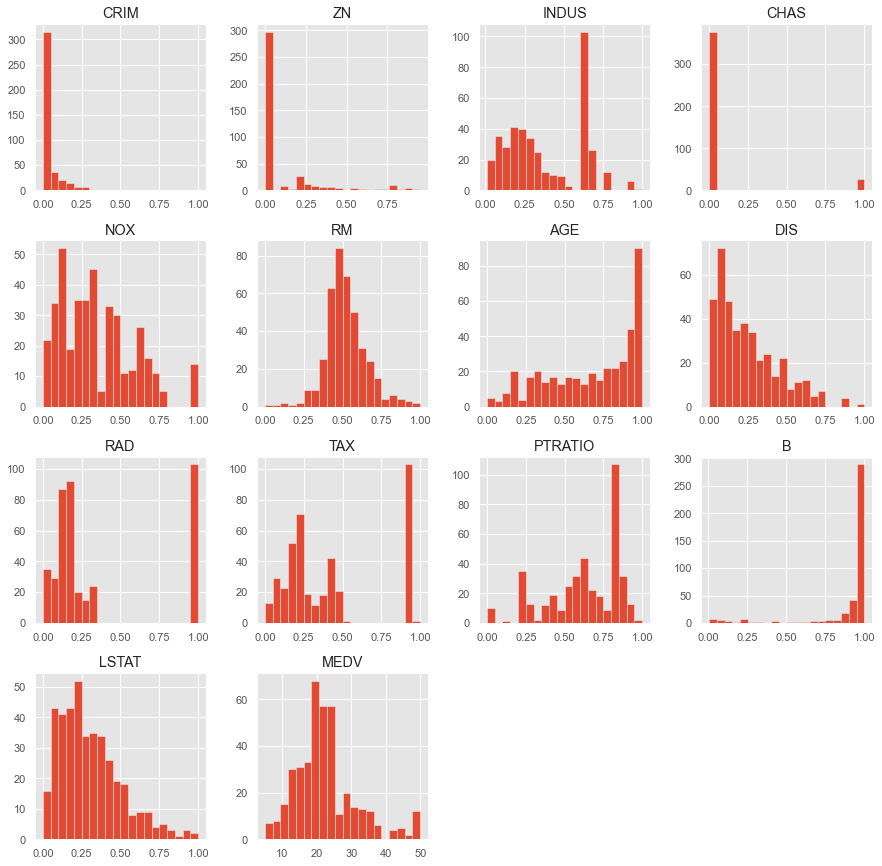

In [6]:
train.hist(figsize=(15, 15),bins=20)
plt.show()

<div dir="rtl">
    در شکل زیر همانطور که می‌بینید فیچرهای
    CHAS
    کمترین همبستگی را با MEDV
    دارد.
    میزان این همبستگی بسیار کم است. (نسبت به همبستگی تارگت با بقیه فیچرها)
</div>

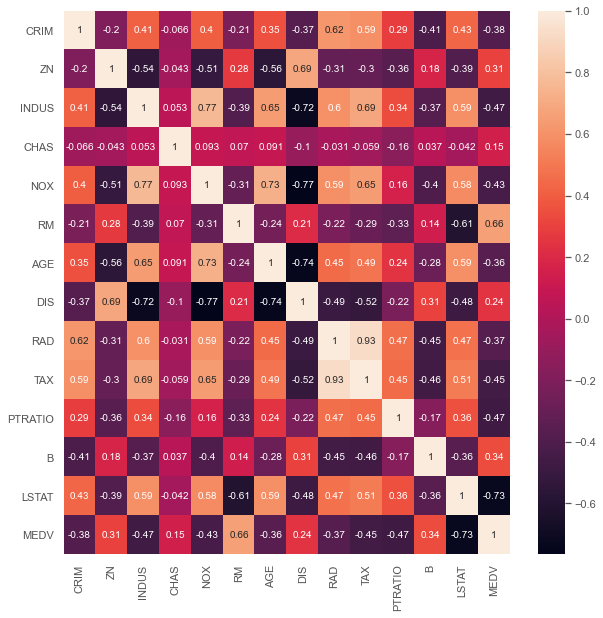

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True);

<div dir="rtl">
    همانطور که در نمودارهای زیر می‌بینید 
    RM
    و DIS
    و LSTAT
    اطلاعت خوبی به ما در مورد MEDV
    می‌دهند.
    برای مثال می‌توان گفت افزایش LSTAT
    باعث کاهش MEDV
    می‌شود.
</div>

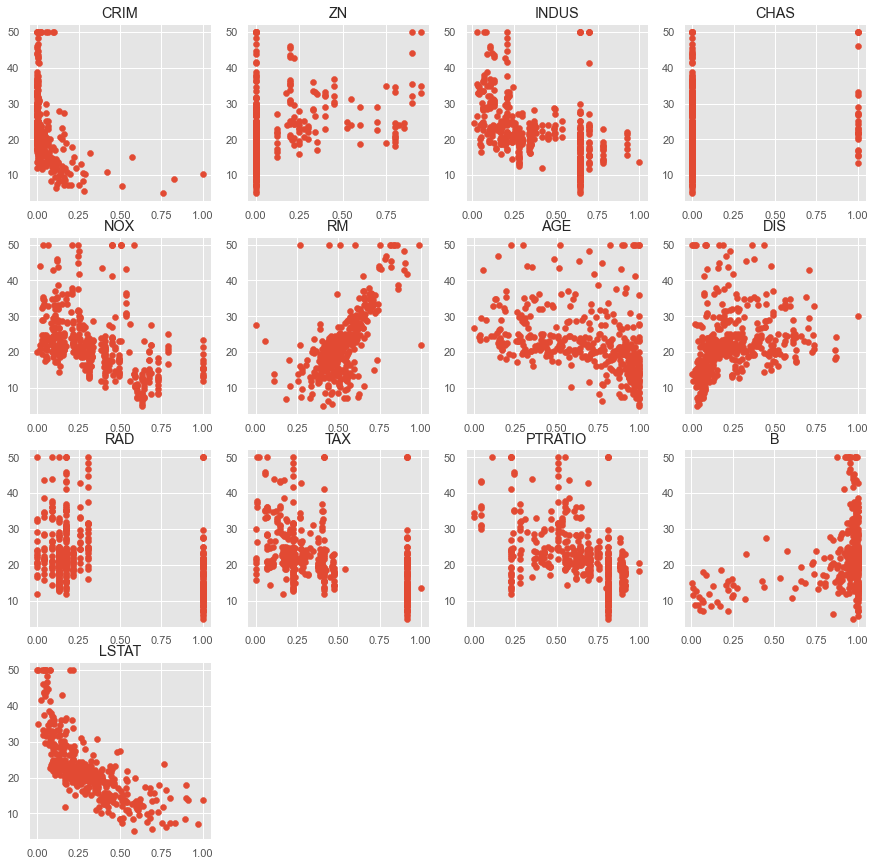

In [8]:
f,axarr = plt.subplots(4, 4, figsize=(15,15))
i = 0
axarr[3,1].axis("off")
axarr[3,2].axis("off")
axarr[3,3].axis("off")
for col in train.columns:
  axarr[i // 4, i % 4].scatter(train[col], train['MEDV'])
  axarr[i // 4, i % 4].set_title(col)
  i += 1
  if i == 13:
    break

In [9]:
y_train, y_test = train['MEDV'], test['MEDV']
X_train, X_test = train.drop('MEDV', axis=1), test.drop('MEDV', axis=1)

<div dir="rtl">
    دقت کنید با توجه به بخش‌های قبلی تمام فیچرها جز
    CHAS
    در مدل قرار می‌گیرند. (از نظر من)
    من 
    CHAS
    را به علت همبستگی کم با تگ خروجی 
    حذف می‌کنم.
</div>

In [10]:
SELECTED_FEATURES = list(X_train.columns)
# SELECTED_FEATURES.remove('CRIM')
# SELECTED_FEATURES.remove('ZN')
# SELECTED_FEATURES.remove('B')
SELECTED_FEATURES.remove('CHAS')
SELECTED_FEATURES

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

<div dir="rtl">
    <h3>
        بخش سوم: پیاده‌سازی مدل
    </h3>
</div>

<div dir="rtl">
    در trian_model
    وزن فیچرها به دست آمده است.
    دقت کنید که در کلاس بیان شد فرم بسته دو صورت دارد که معادل هستند و من از ضرب شبه‌وارون در y بردار ضرایب را به دست آورده‌ام.
    (یعنی خط کامنت‌شده
    در train_model
    نیز به درستی کار می‌کند و همان باز شده شبیه‌وارون است.)
</div>

In [11]:
def train_model(X, y):
#     w = np.linalg.inv(X.T @ X) @ X.T @ y
    w = np.linalg.pinv(X) @ y
    return np.array(w)

def predict(X, w):
    return X @ w

def mse(predicted, y):
    return (np.linalg.norm(predicted - y) ** 2) / len(y)
  
def plot_result(X, predicted, y_test):
    columns = X.columns
    figrows = (len(columns) - 1) // 4 + 1
    f,axarr = plt.subplots(figrows, 4, figsize=(15,15))
    for i in range(4 * figrows):
        if i < len(columns):
            col = columns[i]
            axarr[i // 4, i % 4].scatter(X[col], y_test, label='target')
            axarr[i // 4, i % 4].scatter(X[col], predicted, label='predicted')
            axarr[i // 4, i % 4].set_title(col)
            axarr[i // 4, i % 4].legend()
        else:
            axarr[i // 4, i % 4].axis("off")

<div dir="rtl">
    <h3>
        رگرسیون عادی
    </h3>
</div>

In [12]:
X_train_new = X_train[SELECTED_FEATURES]
X_test_new = X_test[SELECTED_FEATURES]
w = train_model(X_train_new, y_train)
predicted_train = predict(X_train_new, w)
predicted_test = predict(X_test_new, w)
print('train mse score: ', mse(predicted_train, y_train))
print('test mse score: ', mse(predicted_test, y_test))

train mse score:  30.158817908477392
test mse score:  19.657047249819275


train plot


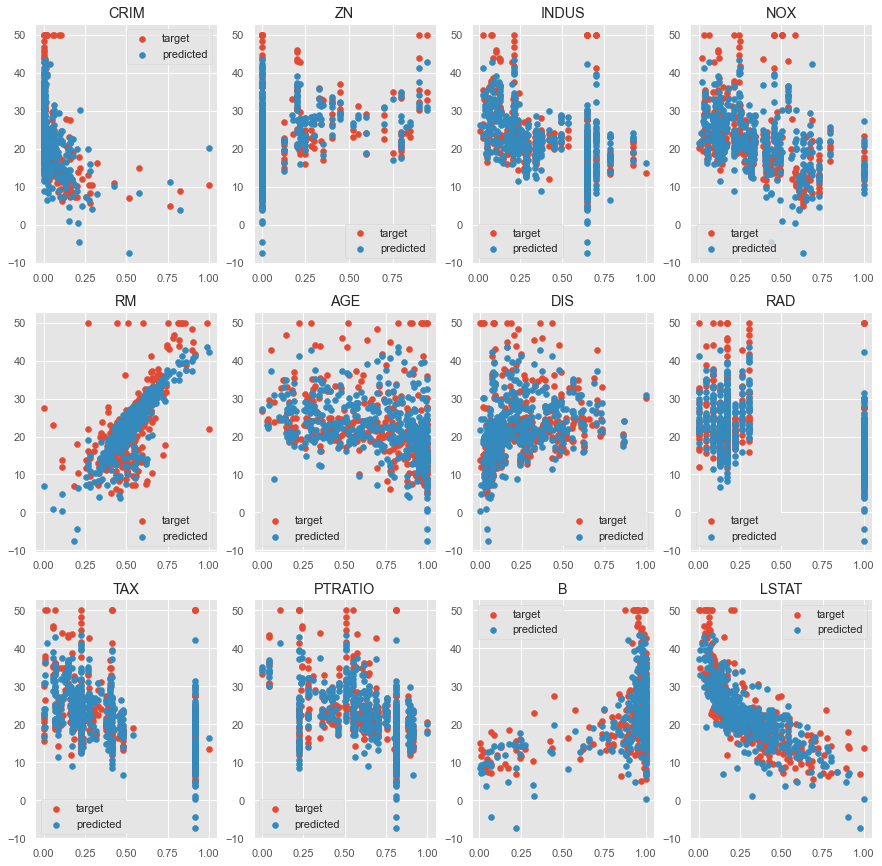

total relation between real tag and prediction


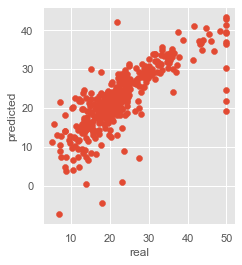

In [13]:
print('train plot')
plot_result(X_train[SELECTED_FEATURES], predicted_train, y_train)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("real")
plt.ylabel("predicted")
plt.scatter(y_train, predicted_train)
plt.show()

test plot


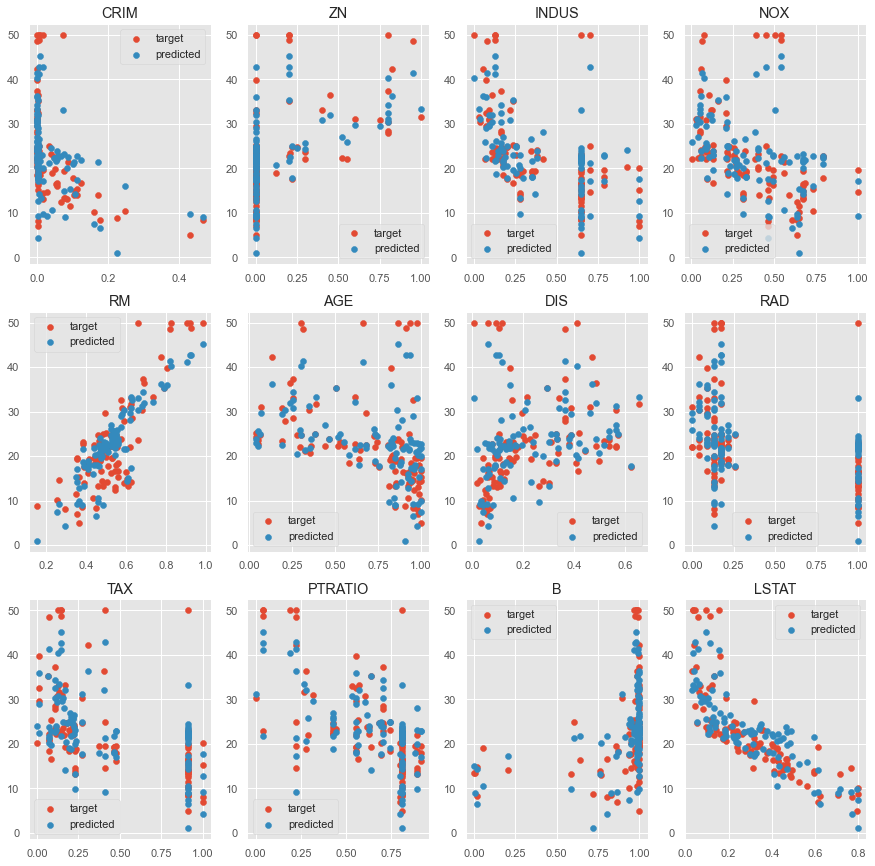

total relation between real tag and prediction


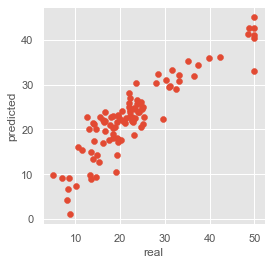

In [14]:
print('test plot')
plot_result(X_test[SELECTED_FEATURES], predicted_test, y_test)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, predicted_test)
plt.xlabel("real")
plt.ylabel("predicted")
plt.show()

<div dir="rtl">
    <h3>
        رگرسیون درجه دو
    </h3>
</div>

In [15]:
def add_2nd_order(X):
    X2 = X.applymap(lambda x: x ** 2)
    return np.hstack([X.to_numpy(), X2.to_numpy()])

X_train_new = add_2nd_order(X_train[SELECTED_FEATURES])
X_test_new = add_2nd_order(X_test[SELECTED_FEATURES])
w = train_model(X_train_new, y_train)
predicted_train = predict(X_train_new, w)
predicted_test = predict(X_test_new, w)
print('train mse score: ', mse(predicted_train, y_train))
print('test mse score: ', mse(predicted_test, y_test))

train mse score:  22.271577914587432
test mse score:  19.948183133526488


train plot


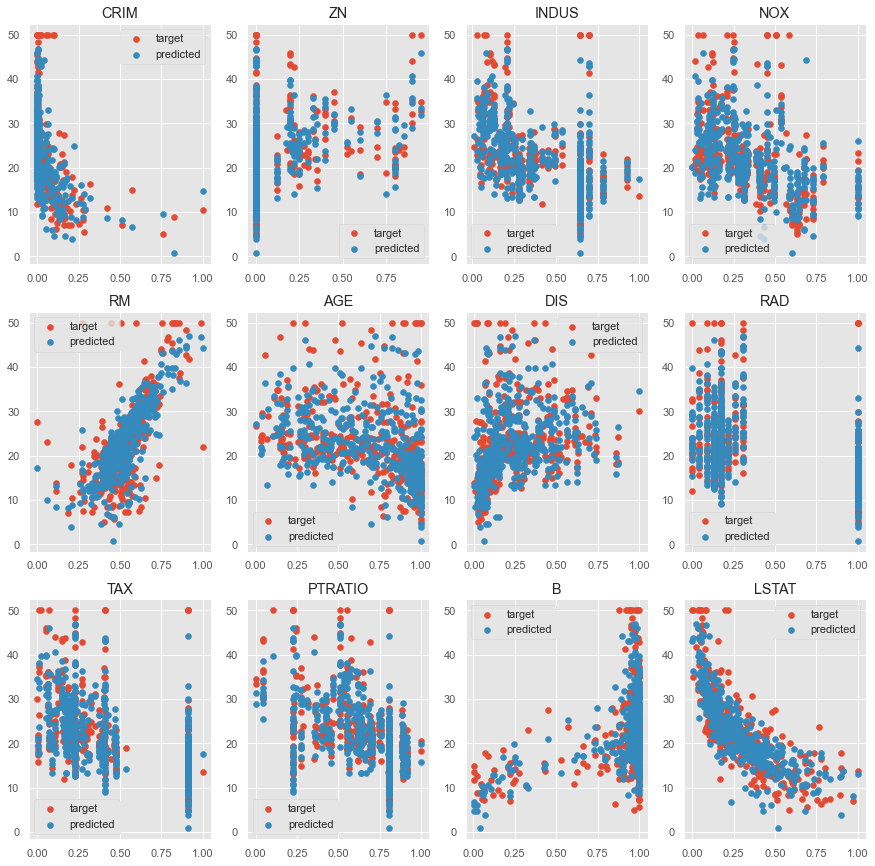

total relation between real tag and prediction


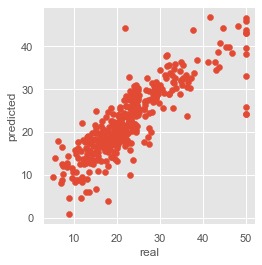

In [16]:
print('train plot')
plot_result(X_train[SELECTED_FEATURES], predicted_train, y_train)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_train, predicted_train)
plt.xlabel("real")
plt.ylabel("predicted")
plt.show()

test plot


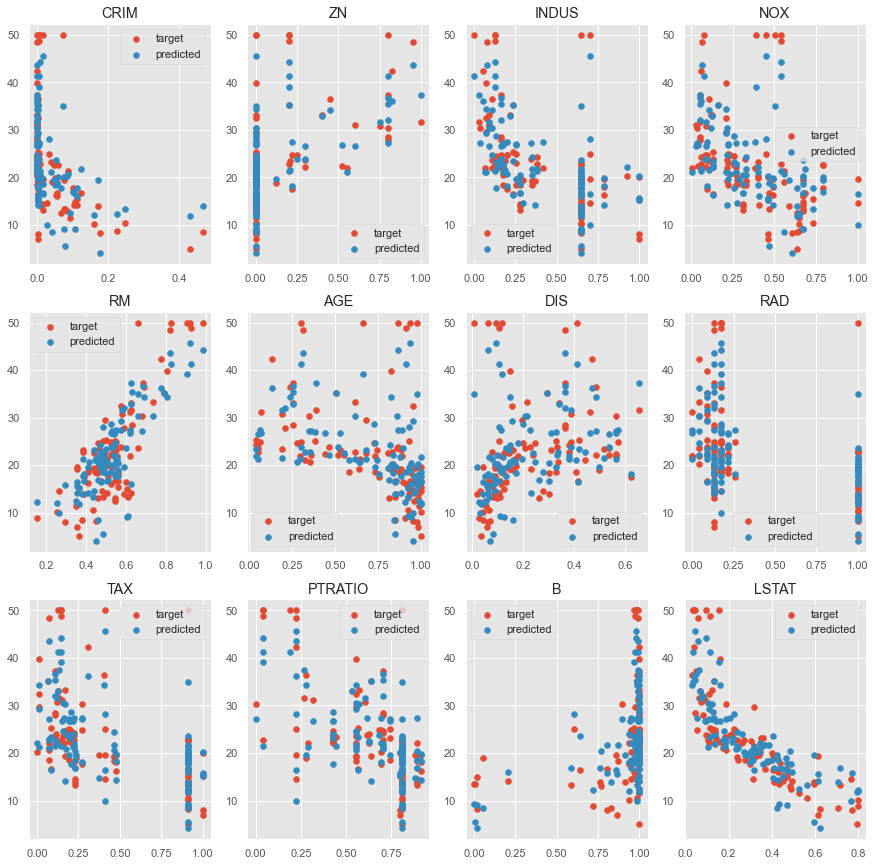

total relation between real tag and prediction


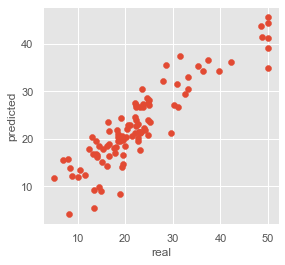

In [17]:
print('test plot')
plot_result(X_test[SELECTED_FEATURES], predicted_test, y_test)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, predicted_test)
plt.xlabel("real")
plt.ylabel("predicted")
plt.show()

<div dir="rtl">
    <h3>
        رگیرسیون با پایه گوسی
    </h3>
    دقت کنید که در ابتدا
    $\mu$
    ها را به صورت تصادفی از مجموعه داده‌ها انتخاب می‌کنیم.
</div>

In [18]:
mu = X_train[SELECTED_FEATURES].sample(10, random_state=0)
mu.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
227,0.004564,0.0,0.210411,0.244856,0.690171,0.792997,0.189699,0.304348,0.229008,0.510638,0.937415,0.127759
264,0.006112,0.2,0.128666,0.539095,0.698410,0.913491,0.072793,0.173913,0.146947,0.042553,0.977281,0.175773
352,0.000743,0.6,0.045088,0.053498,0.445104,0.160659,0.871218,0.130435,0.427481,0.606383,0.988476,0.167219
456,0.052405,0.0,0.646628,0.674897,0.462732,0.875386,0.131946,1.000000,0.914122,0.808511,0.025619,0.476821
419,0.132696,0.0,0.646628,0.685185,0.625216,0.757981,0.060417,1.000000,0.914122,0.808511,0.121363,0.579746


In [19]:
def add_gaussian_feature(X, mu, s):
    X2 = pd.DataFrame()
    for i in range(10):
        distance = np.linalg.norm(X - mu.iloc[i], axis=1)
        X2[f'guassian{i}'] = np.exp(- (distance ** 2 / (2 * (s ** 2))))
    return np.hstack([X.to_numpy(), X2.to_numpy()])

X_train_new = add_gaussian_feature(X_train[SELECTED_FEATURES], mu, 1)
X_test_new = add_gaussian_feature(X_test[SELECTED_FEATURES], mu, 1)
w = train_model(X_train_new, y_train)
predicted_train = predict(X_train_new, w)
predicted_test = predict(X_test_new, w)
print('train mse score: ', mse(predicted_train, y_train))
print('test mse score: ', mse(predicted_test, y_test))

train mse score:  17.531274825704507
test mse score:  12.728058180071516


train plot


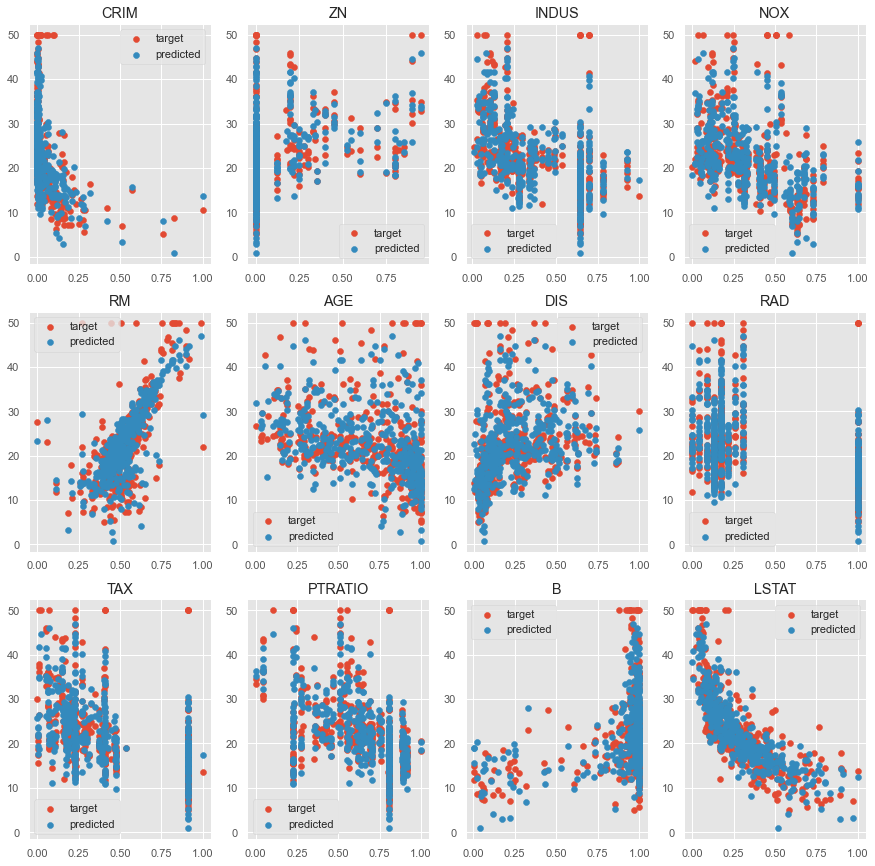

total relation between real tag and prediction


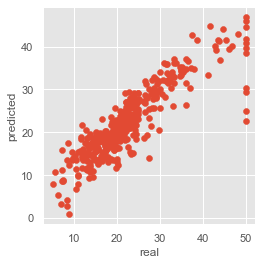

In [20]:
print('train plot')
plot_result(X_train[SELECTED_FEATURES], predicted_train, y_train)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_train, predicted_train)
plt.xlabel("real")
plt.ylabel("predicted")
plt.show()

test plot


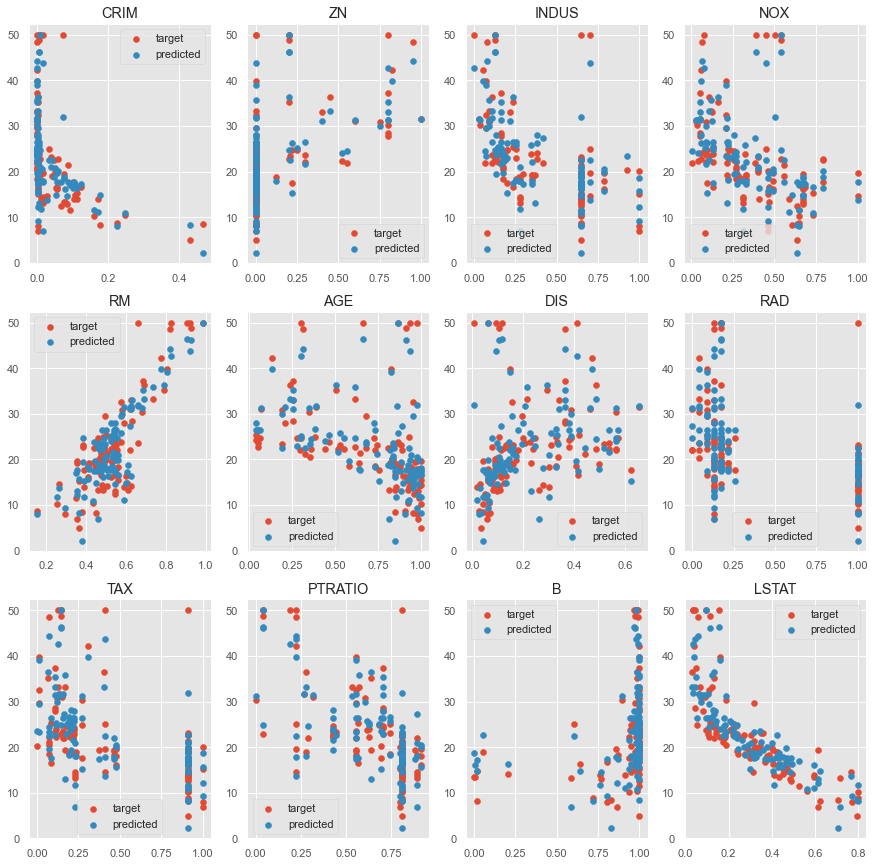

total relation between real tag and prediction


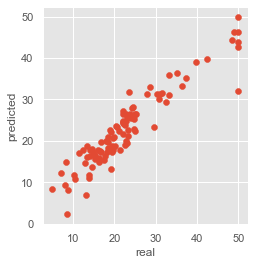

In [21]:
print('test plot')
plot_result(X_test[SELECTED_FEATURES], predicted_test, y_test)
plt.show()

print('total relation between real tag and prediction')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, predicted_test)
plt.xlabel("real")
plt.ylabel("predicted")
plt.show()

<div dir="rtl">
    <h1>
        با فرض نرمالایز کردن:
    </h1>
    همانطور که مشخص است پایه گوسی در این حالت با اختلاف از بقیه روش بهتری است. 
    این روش پیچیدگی بیشتری از دو روش دیگر دارد و خطا هم در داده آموزش و هم داده تست را کاهش می‌دهد.
    پایه درجه دو عملکردی شبیه رگرسیون عادی دارد ولی کمی روی داده تست خطایش بیشتر است که به نظر به خاطر اور فیت شدن بیشتر نسبت به رگرسیون عادی باشد.
    <h1>
        با فرض عدم نرمالایز کردن:
        (که با کامنت کردن کد نرمالایز کننده نتایجش به دست می‌آید)
    </h1> 
    در این حالت نتیجه رگرسیون عادی بهتر از حالت نرمالایز کردن می‌شود ولی
    بر خلاف حالت قبل به علت نرم زیاد 
    $x - \mu$
    تاثیر پایه گوسی خیلی زیاد نخواهد بود و عملکرد آن روی داده تست تنها کمی بهتر از رگرسیون عادی خواهد بود.
    ولی در این حالت اتفاق جالب بهبود عملکرد رگرسیون درجه دو است که علکردش نسبت به حالت نرمالایز بسیار بهتر می‌شود.
    در این حالت به علت نرم زیاد 
    $X^2$
    به نظر مدل پیچیدگی قابل قبولی پیدا کرده‌است.
</div>

<div dir="rtl">
    در نهایت باید گفت بهترین عملکرد برای پایه گوسی در حالت نرمالایز و سپس برای پایه درجه دو در حالت غیر نرمالایز است.
</div>